In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import os

#Merging all the months data into a single csv file
files = [file for file in os.listdir('./Sales_Data')]
df = pd.DataFrame()

# Iterate over each CSV file and append its data
for csv_file in files:
    
    file_path = os.path.join('./Sales_Data/', csv_file)
    try:
        # Explicitly specify encoding or handle errors gracefully
        data = pd.read_csv(file_path, encoding='utf-8')
        df = pd.concat([df, data], ignore_index=True)
    except Exception as e:
        print(f"Error reading {csv_file}: {e}")

df.to_csv('year_data.csv', index=False)
df = pd.read_csv('year_data.csv')


#Cleaning the data
df_copy = df.copy()
df_copy = df_copy.dropna()
df_copy = df_copy[df_copy['Order Date'].str[0:2] != 'Or']
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'], format="%m/%d/%y %H:%M")
df_copy['Price Each'] = df_copy['Price Each'].astype(float)
df_copy['Quantity Ordered'] = df_copy['Quantity Ordered'].astype(int)

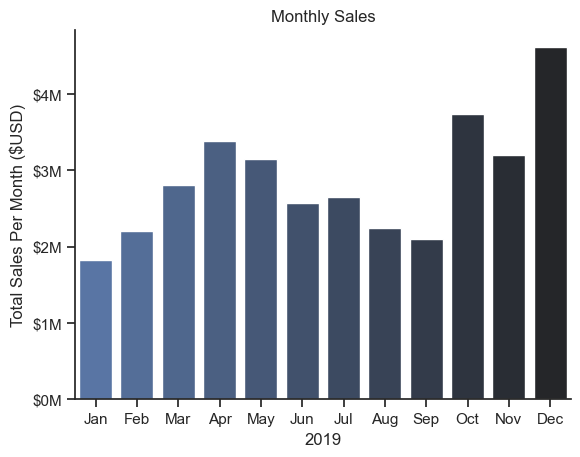

In [2]:
#Adding a month column and a total price column
df_copy['Month'] = df_copy['Order Date'].dt.month
df_copy['Total Price'] = df_copy['Price Each'] * df_copy['Quantity Ordered']

#Grouping the data on the basis of month column and getting the total sales per month
df_monthly_sales = pd.DataFrame(df_copy.groupby('Month')['Total Price'].sum()).reset_index()
df_monthly_sales['Month'] = df_monthly_sales['Month'].apply(lambda x: calendar.month_abbr[x])
df_monthly_sales.set_index('Month', inplace=True)

#Plotting the data
sns.set_theme(style="ticks")
sns.barplot(data=df_monthly_sales, x='Month', y='Total Price', hue='Month', palette='dark:b_r')
plt.title('Monthly Sales')
plt.xlabel('2019')
plt.ylabel('Total Sales Per Month ($USD)')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${int(x/1000000)}M'))
sns.despine()
plt.show()